## Modelo Oculto de Márkov

El Modelo Oculto de Márkov es un modelo estadístico que se asume que el sistema a modelar es de parámetros desconocidos. El objetivo es determinar los parámetros desconocidos u ocultos, a partir de parámetros observables.

En un modelo de Márkov normal, el estado es visible directamente para el observador, por lo que las probabilidades de transición entre estados son los únicos parámetros. En un modelo oculto de Márkov, el estado no es visible directamente, sino que sólo lo son las variables influidas por el estado. Cada estado tiene una distribución de probabilidad sobre los posibles símbolos de salida. Consecuentemente, la secuencia de símbolos generada por un HMM proporciona cierta información acerca de la secuencia de estados.

### Definición Formal del Ejemplo:

Sea $M = (Q, V, π, A, B)$ donde,

$Q$ es el conjunto de estados:
$Q = {Sano, Enfermo}$
$π$ son las probabilidades iniciales:
$π + {0.5, 0.5}$

$V$ son los posibles valores observables en cada estado:
$v = {Comiendo, Durmiendo, Defecando}$

$A$ es el conjunto de probabilidades de transición entre estados:

$A = {(Sano, Sano): 0.7, (Sano, Enfermo): 0.3, (Enfermo, Sano): 0.4, (Enfermo, Enfermo): 0.6}$

$B$ es el conjunto de probabilidades de Observaciones desde un estado $Q_i$:

$B = {(Enfermo, Comiendo): 0.1, (Enfermo, Defecando): 0.5, (Enfermo, Durmiendo): 0.4, (Sano, Comiendo): 0.6,
(Sano, Defecando): 0.2, (Sano, Durmiendo): 0.2}$

$O$ es la secuencia de observables:

$O = (1,1,2,1,0,1,2,1,0,2,2,0,1,0,1)$

###### Ejemplo:

Se considera una situación en donde un bebé está actuando de manera extraña y se quiere modelar la probabilidad de que el comportamiento del bebé se deba a una enfermedad o simplemente a un comportamiento extraño cuando está sano. El bebé puede estar durmiendo, comiendo o defecando.

Lo primero que se hará es crear los estados ocultos los cuales son: sano y enfermo. Cada estado tendrá una probabilidad de 50%

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
from pprint import pprint 

#Se asigna a un arreglo los estados ocultos
hidden_states = ['Sano', 'Enfermo']
#Estas son las probabilidades de estado inicial
pi = [0.5, 0.5]
state_space = pd.Series(pi, index=hidden_states, name='Estados')
print(state_space)
print('\n', state_space.sum())

Sano       0.5
Enfermo    0.5
Name: Estados, dtype: float64

 1.0


Ahora se creará la matriz de transición para los estados ocultos:

In [2]:
#Matriz de probabilidad de transición de estados cambiantes dado un estado
#Se crea una matriz (MxM) donde M es el número de estados.

a_df = pd.DataFrame(columns=hidden_states, index=hidden_states)
a_df.loc[hidden_states[0]] = [0.7, 0.3]
a_df.loc[hidden_states[1]] = [0.4, 0.6]

print(a_df)

a = a_df.values
print('\n', a, a.shape, '\n')
print(a_df.sum(axis=1))

        Sano Enfermo
Sano     0.7     0.3
Enfermo  0.4     0.6

 [[0.7 0.3]
 [0.4 0.6]] (2, 2) 

Sano       1.0
Enfermo    1.0
dtype: float64


Aquí se creará la matriz de transición de los datos observables. Son simplemente las probabilidades de permanecer en el mismo estado o pasar a un estado diferente dado el estado actual.

In [3]:
#Matriz de transición de estados observables.
#Matriz (MxM) donde M es el número de estados observables.

states = ['Durmiendo', 'Comiendo', 'Defecando']
observable_states = states

q_df = pd.DataFrame(columns =states, index =states)
q_df.loc[states[0]] = [0.4, 0.2, 0.4]
q_df.loc[states[1]] = [0.45, 0.45, 0.1]
q_df.loc[states[2]] = [0.45, 0.25, .3]
print(q_df)
q = q_df.values
print('\n', q, q.shape, '\n')
print(q_df.sum(axis=1))

          Durmiendo Comiendo Defecando
Durmiendo       0.4      0.2       0.4
Comiendo       0.45     0.45       0.1
Defecando      0.45     0.25       0.3

 [[0.4 0.2 0.4]
 [0.45 0.45 0.1]
 [0.45 0.25 0.3]] (3, 3) 

Durmiendo    1.0
Comiendo     1.0
Defecando    1.0
dtype: float64


Luego se agrupan en parejas las probabilidades de que pase del estado actual a otro estado.

In [4]:
def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

{('Comiendo', 'Comiendo'): 0.45,
 ('Comiendo', 'Defecando'): 0.1,
 ('Comiendo', 'Durmiendo'): 0.45,
 ('Defecando', 'Comiendo'): 0.25,
 ('Defecando', 'Defecando'): 0.3,
 ('Defecando', 'Durmiendo'): 0.45,
 ('Durmiendo', 'Comiendo'): 0.2,
 ('Durmiendo', 'Defecando'): 0.4,
 ('Durmiendo', 'Durmiendo'): 0.4}


Ahora se crea la matriz de probabilidad de emisión u observación . Esta matriz es de tamaño M x O, donde M es el número de estados ocultos y O es el número de estados observables posibles.

La matriz de emisión informa de la probabilidad de que el bebé se encuentre en uno de los estados ocultos, dado el estado actual observable.

In [5]:
#Matriz de probabilidad de emisión u observación.
#b = probabilidad de observación dada el estado.
#La matriz es el tamaño (M x O) donde M es el número de estados
#y O es el número de diferentes observaciones posibles.

b_df = pd.DataFrame(columns=observable_states, index=hidden_states)
b_df.loc[hidden_states[0]] = [0.2, 0.6, 0.2]
b_df.loc[hidden_states[1]] = [0.4, 0.1, 0.5]

print(b_df)

b = b_df.values
print('\n', b, b.shape, '\n')
print(b_df.sum(axis=1))

        Durmiendo Comiendo Defecando
Sano          0.2      0.6       0.2
Enfermo       0.4      0.1       0.5

 [[0.2 0.6 0.2]
 [0.4 0.1 0.5]] (2, 3) 

Sano       1.0
Enfermo    1.0
dtype: float64


Se agrupan en parejas lo estados para poder observar el peso de cada transición:

In [6]:
#Se muestran las agrupaciones de la matriz de estados ocultos.
print('Agrupaciones de la matriz de Estados Ocultos \n')
hide_edges_wts = _get_markov_edges(a_df)
pprint(hide_edges_wts)

#Se muestran las agrupaciones de la matriz de probabilidad de de emisión u observación.
print('Agrupaciones de la matriz de Emision u Observación \n')
emit_edges_wts = _get_markov_edges(b_df)
pprint(emit_edges_wts)

Agrupaciones de la matriz de Estados Ocultos 

{('Enfermo', 'Enfermo'): 0.6,
 ('Enfermo', 'Sano'): 0.4,
 ('Sano', 'Enfermo'): 0.3,
 ('Sano', 'Sano'): 0.7}
Agrupaciones de la matriz de Emision u Observación 

{('Enfermo', 'Comiendo'): 0.1,
 ('Enfermo', 'Defecando'): 0.5,
 ('Enfermo', 'Durmiendo'): 0.4,
 ('Sano', 'Comiendo'): 0.6,
 ('Sano', 'Defecando'): 0.2,
 ('Sano', 'Durmiendo'): 0.2}


Ahora se creará el gráfico Para poder observar mejor los estados y los pesos del Modelo Oculto de Markov

Nodos:
['Sano', 'Enfermo']

Bordes:

('Sano', 'Sano', {'weight': 0.7, 'label': 0.7})
('Sano', 'Enfermo', {'weight': 0.3, 'label': 0.3})
('Sano', 'Durmiendo', {'weight': 0.2, 'label': 0.2})
('Sano', 'Comiendo', {'weight': 0.6, 'label': 0.6})
('Sano', 'Defecando', {'weight': 0.2, 'label': 0.2})
('Enfermo', 'Sano', {'weight': 0.4, 'label': 0.4})
('Enfermo', 'Enfermo', {'weight': 0.6, 'label': 0.6})
('Enfermo', 'Durmiendo', {'weight': 0.4, 'label': 0.4})
('Enfermo', 'Comiendo', {'weight': 0.1, 'label': 0.1})
('Enfermo', 'Defecando', {'weight': 0.5, 'label': 0.5})


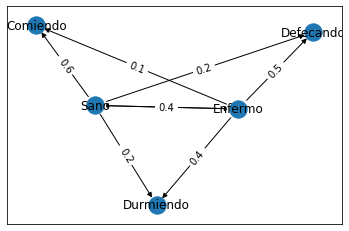

In [7]:
#Se crea el objeto gráfico.
import warnings
from matplotlib.cbook.deprecation import MatplotlibDeprecationWarning

warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
G = nx.MultiDiGraph()

#Los nodos corresponden a los estados.
G.add_nodes_from(hidden_states)
print(f'Nodos:\n{G.nodes()}\n')

#Los bordes representan probabilidades ocultas
for k, v in hide_edges_wts.items():
    #print(k, v)
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
#Los bordes representan probabilidades de emisión u observación.

for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
    
print(f'Bordes:\n')
# Se imprimen las probabilidades de de transición de un estado a otro. 
for a in G.edges(data=True):
    print(a)


    
pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G, pos)

#crear etiquetas  para los bordes
emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=emit_edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_hidden_markov.dot')

En el diagrama anterior no se pueden observar las probabilidades de que permanezca en el mismo estado. Para poder continuar con la explicación, se creó un diagrama en el cual se puedan observar estas transiciones. 

<img src="imag_oculto.png">

En este modelo se puede observar las probabilidades de que el bebé esté o no enfermo dependiendo de lo que esté haciendo. Por ejemplo, si el bebé está durmiendo existe una alta probabilidad(40%) de que esté enfermo y una muy baja de que esté sano(20%).

Por medio de una secuencia de observaciones se puede dicernir la salud del bebé a lo largo del tiempo 

In [8]:
prob_hidden_states = np.array([[0.7, 0.3], [0.4, 0.6]])

obs_map = {'Durmiendo':0, 'Comiendo':1, 'Defecando':2}
obs = np.array([1,1,2,1,0,1,2,1,0,2,2,0,1,0,1])

array_nstates = ([])
inv_obs_map = dict((v,k) for k, v in obs_map.items())

obs_seq = [inv_obs_map[v] for v in list(obs)]

print( pd.DataFrame(np.column_stack([obs, obs_seq]), 
                columns=['Código', 'Secuencia']) )

   Código  Secuencia
0       1   Comiendo
1       1   Comiendo
2       2  Defecando
3       1   Comiendo
4       0  Durmiendo
5       1   Comiendo
6       2  Defecando
7       1   Comiendo
8       0  Durmiendo
9       2  Defecando
10      2  Defecando
11      0  Durmiendo
12      1   Comiendo
13      0  Durmiendo
14      1   Comiendo


Se utilizará el algoritmo de Viterbi para identificar la secuencia más probable de estados ocultos dada la secuencia de observaciones. 

El algoritmo de Viterbi se incrementa en cada paso del tiempo, encontrando la probabilidad máxima de cualquier ruta que llegue al estado i en el tiempo t, que también tenga las observaciones correctas para la secuencia hasta el tiempo t.

El algoritmo también realiza un seguimiento del estado con la mayor probabilidad en cada etapa. Al final de la secuencia, el algoritmo iterará hacia atrás seleccionando el estado que "ganó" cada paso de tiempo, y creando así la ruta más probable, o la secuencia probable de estados ocultos que condujeron a la secuencia de observaciones.

In [11]:
def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    print('nStates', nStates)
    # Camino inicial. Matrices con ceros.
    path = np.zeros(T)
    # delta --> mayor probabilidad de cualquier camino que alcance el estado i.
    delta = np.zeros((nStates, T))
    # phi --> argmax por paso de tiempo para cada estado
    phi = np.zeros((nStates, T))
    
    # inicio
    delta[:, 0] = pi * b[:, obs[0]]
    phi[:, 0] = 0

    print('\nInicio. Caminar hacia adelante\n')    
    # Extensión del algoritmo directo
    for t in range(1, T):
        for s in range(nStates):
                
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # Encontrar el camino óptimo
    print('-'*50)
    print('Iniciar retroceso\n')
    path[T-1] = np.argmax(delta[:, T-1])
    
    
    for t in range(T-2, -1, -1):
        
        x = int(path[t+1])
    
        path[t] = phi[x, [t+1]]
        print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi


print('B: ', b)
print('a: ',prob_hidden_states)
path, delta, phi = viterbi(pi, prob_hidden_states, b, obs)
print('\n La mejor ruta del estado: \n', path)
print('\n delta:\n', delta)
print('phi:\n', phi)


B:  [[0.2 0.6 0.2]
 [0.4 0.1 0.5]]
a:  [[0.7 0.3]
 [0.4 0.6]]
nStates 2

Inicio. Caminar hacia adelante

s=0 and t=1: phi[0, 1] = 0.0
s=1 and t=1: phi[1, 1] = 0.0
s=0 and t=2: phi[0, 2] = 0.0
s=1 and t=2: phi[1, 2] = 0.0
s=0 and t=3: phi[0, 3] = 0.0
s=1 and t=3: phi[1, 3] = 1.0
s=0 and t=4: phi[0, 4] = 0.0
s=1 and t=4: phi[1, 4] = 0.0
s=0 and t=5: phi[0, 5] = 0.0
s=1 and t=5: phi[1, 5] = 1.0
s=0 and t=6: phi[0, 6] = 0.0
s=1 and t=6: phi[1, 6] = 0.0
s=0 and t=7: phi[0, 7] = 0.0
s=1 and t=7: phi[1, 7] = 1.0
s=0 and t=8: phi[0, 8] = 0.0
s=1 and t=8: phi[1, 8] = 0.0
s=0 and t=9: phi[0, 9] = 0.0
s=1 and t=9: phi[1, 9] = 1.0
s=0 and t=10: phi[0, 10] = 1.0
s=1 and t=10: phi[1, 10] = 1.0
s=0 and t=11: phi[0, 11] = 1.0
s=1 and t=11: phi[1, 11] = 1.0
s=0 and t=12: phi[0, 12] = 1.0
s=1 and t=12: phi[1, 12] = 1.0
s=0 and t=13: phi[0, 13] = 0.0
s=1 and t=13: phi[1, 13] = 0.0
s=0 and t=14: phi[0, 14] = 0.0
s=1 and t=14: phi[1, 14] = 1.0
--------------------------------------------------
Iniciar retr

In [10]:
state_map = {0:'Sano', 1:'Enfermo'}
state_path = [state_map[v] for v in path]

(pd.DataFrame()
 .assign(Observación=obs_seq)
 .assign(Mejor_Camino=state_path))

,Observación,Mejor_Camino
0,Comiendo,Sano
1,Comiendo,Sano
2,Defecando,Sano
3,Comiendo,Sano
4,Durmiendo,Sano
5,Comiendo,Sano
6,Defecando,Sano
7,Comiendo,Sano
8,Durmiendo,Enfermo
9,Defecando,Enfermo
